### Wine regions in Poland

This project aims to find wine regions in Poland and describe meteorological conditions observed over them.\
It is going to cover topics like:
- Find wine regions in Poland
- Analyze meteorological conditions over discovered regions
- Present how to use spatial-econometrics method to find spatial dependencies between geographical objects 
- Present how to obtain and analyze open meteorological data
- Have fun with data ;)

In [2]:
import geopandas as gpd
import libpysal as ps
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
from shapely.geometry import MultiPolygon

### Upload shapefile which consists info about number of vineyards in each administrative unit

In [3]:
gminy = gpd.read_file('shp/gminy.shp')

### Calculate weight and Local Moran's I

In [5]:
w_weights = ps.weights.Queen.from_dataframe(gminy)
moran_loc = Moran_Local(gminy['winnice'], w_weights)

# Local Moran's I value
local_moran_i = moran_loc.Is
gminy['Local_Moran_I'] = local_moran_i

/tmp/ipykernel_1982/3992818102.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_weights = ps.weights.Queen.from_dataframe(gminy)


### Add to shapefile (Administrative units) info about class (HH, LH, HL, LL) and plot results

* HH - units where two or more vineyards are located and are mostly surrounded by other HH  
* LL - units where less than two vineyards are located and are mostly surrounded by other LL  
* HL - units where two or more vineyards are located and are mostly surrounded by units where less than two vineyards are located  
* LH - units where less than two vineyards are located and are mostly surrounded by units where two or more vineyards are located  

/tmp/ipykernel_1982/222624459.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gminy['Moran_Class'][i] = 'HL'
/tmp/ipykernel_1982/222624459.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

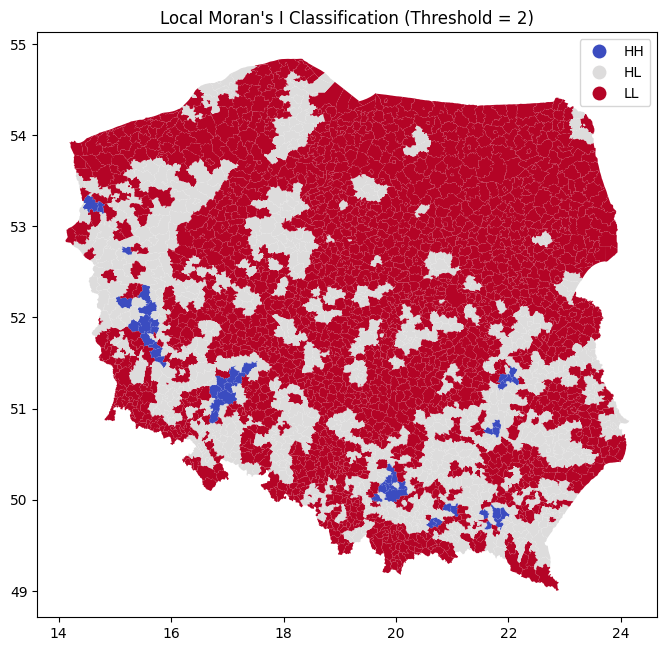

In [7]:
# Create a function to classify values into four categories
def classify_moran_i(value, threshold):
    if value >= threshold:
        return 'HH'
    else:
        return 'LL'

# Define a threshold for HIGH values (2 is based on general knowledge on the topic)
hh_threshold = 2

gminy['Moran_Class'] = [classify_moran_i(i, hh_threshold) for i in local_moran_i]

# Update classification for LH and HL based on Moran's I values
for i in range(len(gminy)):
    if local_moran_i[i] < 0 and gminy['Moran_Class'][i] == 'HH':
        gminy['Moran_Class'][i] = 'LH'
    elif local_moran_i[i] < 0 and gminy['Moran_Class'][i] == 'LL':
        gminy['Moran_Class'][i] = 'HL'
        
# Create a map of the classification
fig, ax = plt.subplots(figsize=(8, 8))
gminy.plot(column='Moran_Class', cmap='coolwarm', ax=ax, legend=True)
ax.set_title('Local Moran\'s I Classification (Threshold = {})'.format(hh_threshold))

plt.show()        